In [1]:
##########################
# 配置运行环境
##########################

%matplotlib inline

import numpy as np
import pandas as pd
from IPython.display import Math, Latex
from matplotlib import pyplot
import seaborn as sns

# matplotlib 对中文的支持
from matplotlib import font_manager
cn_font = font_manager.FontProperties(fname='msyh.ttf', size=16)  # 网上支持中文

from matplotlib import rcParams
# rcParams['font.family'] = 'Microsoft YaHei'  # 本地支持中文

# 保存为 pdf 格式
rcParams['pdf.fonttype'] = 42
rcParams['figure.figsize'] = (8,5)

# Look pretty...
from matplotlib import style
style.use('ggplot')

# 设置 numpy 的输出精度, 并且阻止使用科学记数法
np.set_printoptions(precision=6, suppress=True)

# 离散随机变量的期望

### 模拟射击的期望

已知甲、乙两名战士的射击水平如下

- 甲战士

| 取值 | 6 | 7 | 8 | 9 | 10 |
|-----|---|---|---|---|---|
| 概率 | 0.2 | 0.4 | 0.0 | 0.1 | 0.3 |

- 乙战士

| 取值 | 6 | 7 | 8 | 9 | 10 |
|-----|---|---|---|---|---|
| 概率 | 0.0 | 0.2 | 0.5 | 0.3 | 0.0 |

模拟两人的射击情况

In [2]:
from scipy.stats import rv_discrete

def simShooting(name: str, pmf: dict, n: int=1) -> list:
    """
    模拟射击，返回射击成绩列表和汇总表
    
    name: 射手姓名
    pmf: 射手的射击水平字典，key 表示环数，value 表示概率
    n: 射击次数
    """
    
    # 定义一个服从给定分布的随机变量
    X = rv_discrete(values=zip(*pmf.items()))
    
    # 生成 n 个观测值
    samples = pd.Series(X.rvs(size=n))
    
    # 统计数据的频次
    counts = samples.value_counts()
    
    reports = pd.DataFrame({"环数": counts.index, "次数": counts.values, "频率": counts.values/n})
    
    print('战士{}射击 {} 次的成绩: {}'.format(name, n, samples.values.tolist()))
    print(reports.sort_values(by='环数').to_string(index=False, float_format='{:.3f}'.format, col_space=8))
    print('战士{}射击的平均环数为: {}'.format(name, samples.mean()))

In [3]:
# 两名战士的射击水平分布
pmf_A = {6: 0.2, 7: 0.4, 8: 0.0, 9:0.1, 10: 0.3}
pmf_B = {6: 0.0, 7: 0.5, 8: 0.2, 9:0.3, 10: 0.0}

# 射击次数
n = 100

In [4]:
simShooting("甲", pmf_A, n)

战士甲射击 100 次的成绩: [7, 7, 9, 9, 6, 10, 6, 6, 10, 7, 6, 6, 7, 7, 10, 7, 10, 7, 10, 6, 7, 9, 10, 10, 7, 7, 7, 10, 9, 7, 7, 9, 10, 6, 7, 7, 6, 7, 10, 10, 6, 6, 10, 10, 7, 10, 7, 6, 7, 9, 10, 9, 9, 9, 10, 10, 7, 7, 6, 6, 7, 10, 7, 7, 10, 10, 7, 6, 7, 9, 7, 10, 9, 10, 10, 9, 10, 6, 10, 9, 7, 10, 6, 6, 10, 6, 6, 9, 10, 10, 7, 10, 10, 6, 7, 6, 10, 10, 10, 10]
      环数       次数       频率
       6       21    0.210
       7       30    0.300
       9       14    0.140
      10       35    0.350
战士甲射击的平均环数为: 8.12


In [5]:
simShooting("乙", pmf_B, n)

战士乙射击 100 次的成绩: [7, 9, 7, 7, 7, 9, 7, 8, 7, 9, 7, 7, 9, 9, 9, 7, 7, 8, 9, 8, 8, 9, 7, 7, 9, 7, 8, 9, 7, 8, 8, 7, 7, 9, 7, 9, 9, 9, 7, 8, 7, 9, 9, 8, 8, 7, 7, 8, 9, 7, 7, 9, 8, 7, 7, 9, 7, 8, 7, 9, 9, 7, 9, 7, 9, 7, 9, 9, 8, 7, 9, 7, 9, 7, 9, 7, 9, 8, 8, 9, 7, 7, 8, 8, 7, 9, 7, 7, 7, 9, 9, 7, 7, 9, 7, 7, 9, 7, 9, 9]
      环数       次数       频率
       7       45    0.450
       8       18    0.180
       9       37    0.370
战士乙射击的平均环数为: 7.92


### 模拟掷骰子的期望

In [6]:
import random

def rollDie(n: int=1):
    """
    返回投掷结果
    """
    return np.random.randint(1, 7, size=n).tolist()

# 模拟投掷结果
n = 100
print('投掷 {} 次骰子的模拟结果：{}'.format(n, rollDie(n)))

# 投骰子的期望
print('投掷 {} 次骰子的均值为：{}'.format(n, sum(rollDie(n))/n))

投掷 100 次骰子的模拟结果：[4, 1, 3, 1, 4, 4, 5, 1, 6, 1, 1, 2, 3, 4, 4, 5, 1, 3, 1, 5, 5, 4, 2, 3, 4, 5, 1, 5, 1, 5, 4, 2, 4, 3, 2, 6, 1, 1, 6, 4, 3, 5, 3, 1, 3, 3, 1, 3, 5, 4, 3, 2, 1, 2, 2, 3, 5, 5, 3, 3, 6, 4, 5, 6, 4, 4, 5, 2, 2, 6, 5, 2, 3, 3, 3, 6, 3, 1, 6, 5, 3, 3, 3, 6, 2, 6, 5, 2, 5, 4, 4, 3, 1, 1, 4, 6, 5, 1, 3, 2]
投掷 100 次骰子的均值为：3.52


我们不妨看看随着投掷次数的增加期望值的变化。

In [7]:
for n in range(1, 7):
    print('投掷 {} 次骰子的均值为：{}'.format(10**n, sum(rollDie(10**n))/(10**n)))

投掷 10 次骰子的均值为：4.3
投掷 100 次骰子的均值为：3.37
投掷 1000 次骰子的均值为：3.534
投掷 10000 次骰子的均值为：3.4849
投掷 100000 次骰子的均值为：3.49906
投掷 1000000 次骰子的均值为：3.499804


### 验血分组问题

若有 $N$ 人参加疾病普查，每个人化验结果呈阳性的概率都为 $p$，如何分组工作量最小.

验血总次数 $X$ 的期望为 $E(X) = \frac{N}{k}(1+k-k(1-p)^k)$.

我们通过观测图像的方式找最优的 $k$ 值.

In [8]:
def bestGroupNum(n: int, p: float):
    """
    有 n 人参加疾病普查，每个人化验结果呈阳性的概率都为 $p$，如何分组工作量最小.
    
    n: 参加的人数
    p: 每个人呈阳性的概率
    """
    x = np.arange(1, n+1)
    pyplot.figure()
    pyplot.plot(x, (n/x)*(1+x-x*(1-p)**x), '.-b', linewidth=0.5)
    pyplot.xlim(-1, n/2)

    pyplot.title('验血的最优分组数 $p={}$'.format(p), fontproperties=cn_font)
    pyplot.xlabel('每组的人数', fontproperties=cn_font)
    pyplot.ylabel('总验血次数', fontproperties=cn_font)
    pyplot.show()

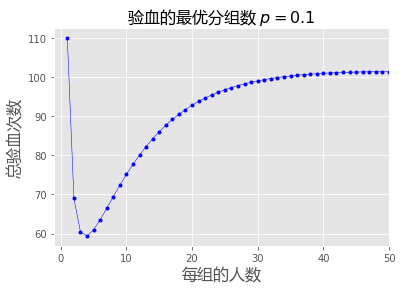

In [9]:
bestGroupNum(100, 0.1)

当检验人数为 100 人时，若每个人验血呈阳性的概率为 0.1，则最优分组人数为 4，此时期望的总验血次数为 59 次，能减少 40% 的工作量！

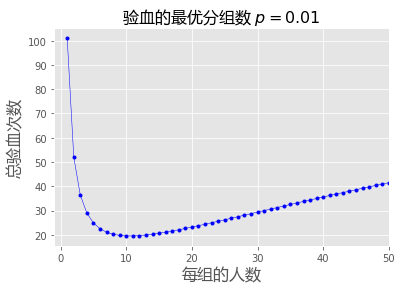

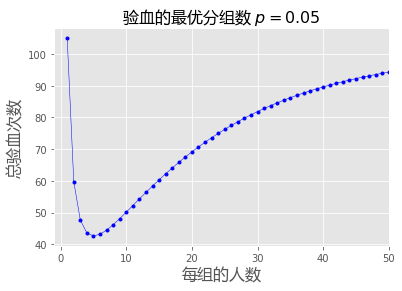

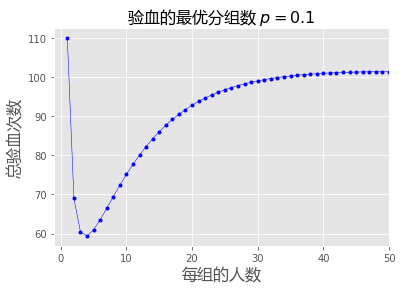

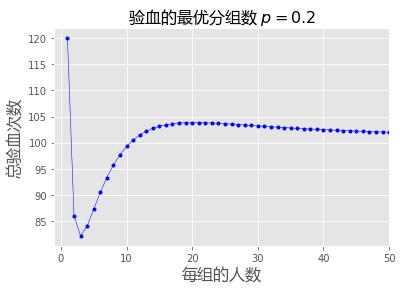

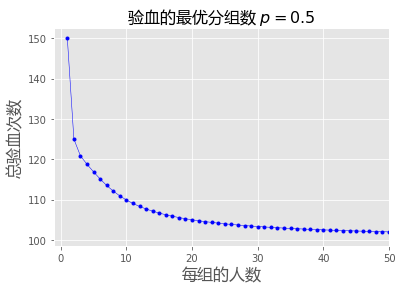

In [10]:
for p in [0.01, 0.05, 0.1, 0.2, 0.5]:
    bestGroupNum(100, p)

# 离散随机变量的方差

方差显示了随机变量的取值对其均值的偏离程度。我们可以利用方差来衡量不确定性，越大的方差意味着越大的不确定性。

In [11]:
# 战士甲、乙射击水平的概率分布
pmf_A = {6: 0.2, 7: 0.4, 8: 0.0, 9:0.1, 10: 0.3}
pmf_B = {6: 0.0, 7: 0.5, 8: 0.2, 9:0.3, 10: 0.0}

# 定义随机变量 X, Y 分别服从战士甲、乙的分布
X = rv_discrete(values=zip(*pmf_A.items()))
Y = rv_discrete(values=zip(*pmf_B.items()))

我们直观的看一下射击时两个战士发挥的稳定性

In [12]:
def stabilityOfShooting(name: str, pmf: dict, n: int):
    """
    绘制射击 n 次的稳定性图形
    
    name: 射手名称
    pmf: 射手的水平的概率分布字典
    n: 射击次数
    """
    X = rv_discrete(values=zip(*pmf.items()))
    
    fig = pyplot.figure()
    
    pyplot.plot(range(n), X.rvs(size=n), 'o--', linewidth=1, ms=3)
    pyplot.hlines(X.mean(), -1, n+1, colors='b', lw=2)

    # 画图范围
    pyplot.xlim(-1, n+1)
    pyplot.ylim(5.5, 10.5)

    pyplot.title('战士{}射击的稳定性'.format(name), fontproperties=cn_font)
    pyplot.xlabel('次数', fontproperties=cn_font)
    pyplot.ylabel('环数', fontproperties=cn_font)
    pyplot.show()

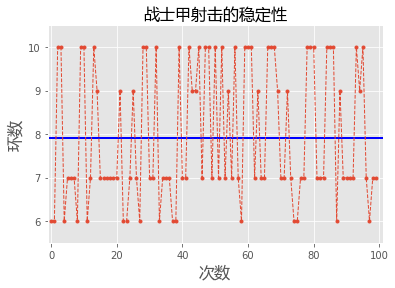

In [13]:
stabilityOfShooting('甲', pmf_A, 100)

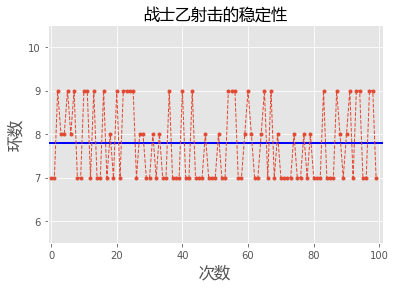

In [14]:
stabilityOfShooting('乙', pmf_B, 100)

下面，我们考察如果只射击一次，两名战士谁的胜面大一些

In [15]:
from collections import Counter

# 试验次数
trails = 10000

results_A = X.rvs(size=trails)
results_B = Y.rvs(size=trails)

for i in range(10):
    print('第 {:2d} 次比拼，战士甲为 {:2d} 环，战士乙为 {:2d} 环.'.format(i+1, results_A[i], results_B[i]))
    
wins = Counter(['甲胜' if a > b else '乙胜' if b > a else '平局' for a,b in zip(results_A, results_B)])

print()
print('比拼 {} 次，其中甲胜 {:2d} 局，乙胜 {:2d} 局，平手 {:2d} 局.'.format(trails, wins['甲胜'], wins['乙胜'], wins['平局']))

第  1 次比拼，战士甲为  7 环，战士乙为  8 环.
第  2 次比拼，战士甲为  6 环，战士乙为  7 环.
第  3 次比拼，战士甲为 10 环，战士乙为  9 环.
第  4 次比拼，战士甲为  7 环，战士乙为  7 环.
第  5 次比拼，战士甲为  6 环，战士乙为  8 环.
第  6 次比拼，战士甲为  7 环，战士乙为  9 环.
第  7 次比拼，战士甲为 10 环，战士乙为  9 环.
第  8 次比拼，战士甲为  9 环，战士乙为  9 环.
第  9 次比拼，战士甲为  6 环，战士乙为  8 环.
第 10 次比拼，战士甲为 10 环，战士乙为  8 环.

比拼 10000 次，其中甲胜 3702 局，乙胜 4002 局，平手 2296 局.


这里，我们发现，虽然 A 战士平均看来更好，但是 B 战士的发挥更稳定，在给定的规则下，胜的可能性反而更大.

In [16]:
print("战士 A 的期望为 {:.2f}，方差为 {:.3f}.".format(X.mean(), X.var()))
print("战士 B 的期望为 {:.2f}，方差为 {:.3f}.".format(Y.mean(), Y.var()))

战士 A 的期望为 7.90，方差为 2.490.
战士 B 的期望为 7.80，方差为 0.760.


 当然，方差的波动有两种情形，可能朝好的方向波动，也可能朝坏的方向波动。因此也不一定方差越大越不好。例如在股票投资中，期望表示预期收益，方差表示风险。这里风险是个中性词，实际收益好于预期也是风险，当然，这种风险是我们想要的。

## 应用实例 投资组合分析